Apa lima permainan video terlaris berdasarkan penjualan global?
Berapa total penjualan global dari lima permainan teratas?
Permainan video apa yang memiliki penjualan terbesar di Amerika Utara?
Berapa rata-rata penjualan permainan video di Jepang?
Apa genre permainan video yang paling banyak muncul di lima peringkat teratas?
Apa platform yang paling sering muncul di lima peringkat teratas?
Apakah ada hubungan antara tahun rilis dan penjualan global?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df = df.dropna()

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Apa lima permainan video terlaris berdasarkan penjualan global?

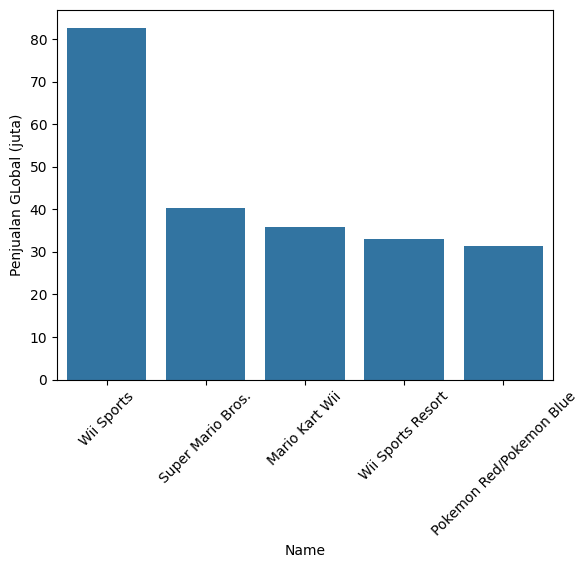

In [ ]:
#SELECT Name, Rank From df GROUP BY Global_Sales ORDER BY DESC LIMIT 5
#nlargest()
df.nlargest(5, 'Global_Sales')[['Name', 'Rank', 'Global_Sales']]

#sort_values
top_game = df.sort_values(by='Global_Sales', ascending = False).head(5)[['Rank', 'Name', 'Global_Sales']]
top_game

#visualisasi
sns.barplot(data = top_game, x = 'Name', y = 'Global_Sales')
plt.ylabel('Penjualan GLobal (juta)')
plt.tick_params(axis = 'x', rotation= 45)
plt.show()

Berapa total penjualan global dari lima permainan teratas?

In [ ]:
#SELECT SUM(Global_Sales) AS total_penjualan  FROM(
#     SELECT Global_Sales
#     FROM df
#     ORDER BY DESC
#     LIMIT 5
# )
df_top_game = df.sort_values(by="Global_Sales", ascending = False).head(5)
print("Top 5 Permainan Teratas")
print(df_top_game[['Rank', 'Name', 'Global_Sales']].to_string(index=False))
total_sales = df_top_game['Global_Sales'].sum()
print(f'total penjualan global dari lima permainan teratas : {total_sales}')

Top 5 Permainan Teratas
 Rank                     Name  Global_Sales
    1               Wii Sports         82.74
    2        Super Mario Bros.         40.24
    3           Mario Kart Wii         35.82
    4        Wii Sports Resort         33.00
    5 Pokemon Red/Pokemon Blue         31.37
total penjualan global dari lima permainan teratas : 223.17


Permainan video apa yang memiliki penjualan terbesar di Amerika Utara?

 video yang memiliki penjualan terbesar di Amerika Utara : Wii Sports


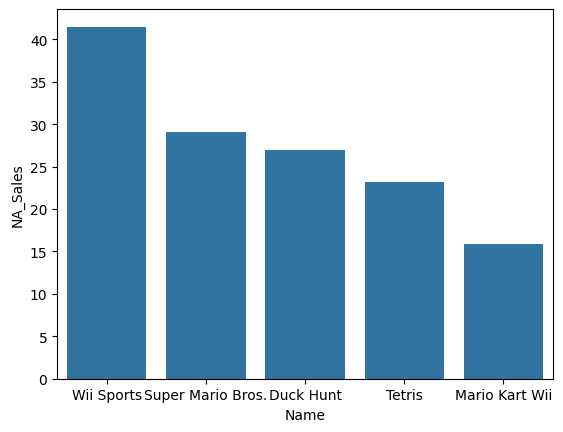

'Wii Sports'

In [ ]:
#Select Name From df Where na_sales = SELECT(max(na_sales)FROM df)

top_na_sales = df.loc[df['NA_Sales'].idxmax(), 'Name']
print(f" video yang memiliki penjualan terbesar di Amerika Utara : {top_na_sales}")

top_na_sales = df.sort_values(by = 'NA_Sales', ascending=False).head(5)[['Name', 'Rank', 'NA_Sales']]

#visualisasi penjualan game terbesar di amerika
sns.barplot(data = top_na_sales, x = 'Name', y = 'NA_Sales')
plt.show()

Berapa rata-rata penjualan permainan video di Jepang?

In [ ]:
#SELECT AVG(JP_Sales) FROM df

avg_jp_sales = df['NA_Sales'].mean()
print(f"rata-rata penjualan permainan video di Jepang : {avg_jp_sales}")

rata-rata penjualan permainan video di Jepang : 0.26564667607881653


Apa genre permainan video yang paling banyak muncul di lima peringkat teratas?

In [ ]:
#genre 5 peringkat teratas
top_rank = df.sort_values(by='Rank').head(5)

#menghitung yang paling sering muncul di top rank
hitung_genre = top_rank['Genre'].value_counts()

#mengambil index tertinggi
top_genre = hitung_genre.idxmax()
print(f"genre permainan video yang paling banyak muncul di lima peringkat teratas : {top_genre}")

genre permainan video yang paling banyak muncul di lima peringkat teratas : Sports


Apa platform yang paling sering muncul di lima peringkat teratas?

In [ ]:
#menggunakan sort_values
top_rank = df.sort_values(by = 'Rank').head(5)

#hitung genre
hitung_genre = top_rank['Platform'].value_counts()

#mengambil index tertinggi
top_genre = hitung_genre.idxmax()
print(f'platform yang paling sering muncul di lima peringkat teratas : {top_genre}')

platform yang paling sering muncul di lima peringkat teratas : Wii


Apakah ada hubungan antara tahun rilis dan penjualan global?

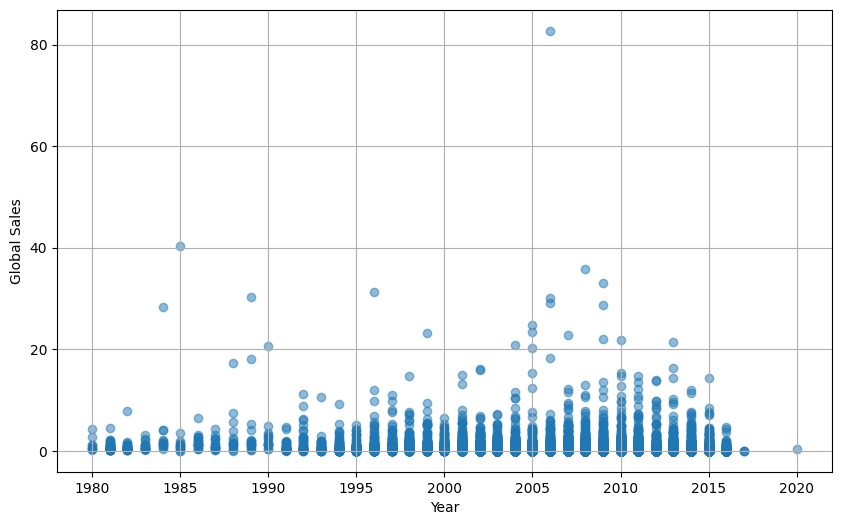

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Global_Sales'], alpha=0.5)
plt.ylabel("Global Sales")
plt.xlabel("Year")
plt.grid(True)
plt.show()